In [1]:
library('readr')
library("stringr")
library('dplyr')
library("ggplot2")
library('tibble')
library("RColorBrewer")
library("magrittr")
library("cowplot")
library("eulerr")
library("ggVennDiagram")
library('Gviz')
library('GenomicRanges')
library('rtracklayer')
library('trackViewer')
library("org.Hs.eg.db")
library("RIdeogram")


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:dplyr':

    combine, intersect, setdiff, union


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min



Attaching 

In [2]:
makeLegendGrob <- function(labels, fill = c("red", "blue"), cex = 1.5) {
    return(legendGrob(labels,
        pch = 21,
        gp = gpar(
            col = "black",
            fill = fill,
            cex = cex
        )
    )
    )
}

In [3]:
colors = factor(c("blue", "red"), ordered = TRUE)

In [4]:
  legd <- legendGrob(c("Girls", "Boys", "dog"), pch=21, gp=gpar(col = "black",fill = factor(c("red", "blue"), ordered = TRUE), cex = 2))

In [5]:
    legd <- makeLegendGrob(c("Girls", "Boys", "dog"))


In [6]:
p = ggplot()

In [11]:
        p <- plot_grid(p + theme(legend.position = "none"),
            nrow = 1,
            rel_widths = c(1), labels = "AUTO",
            align = "vh",
            axis = "bt")

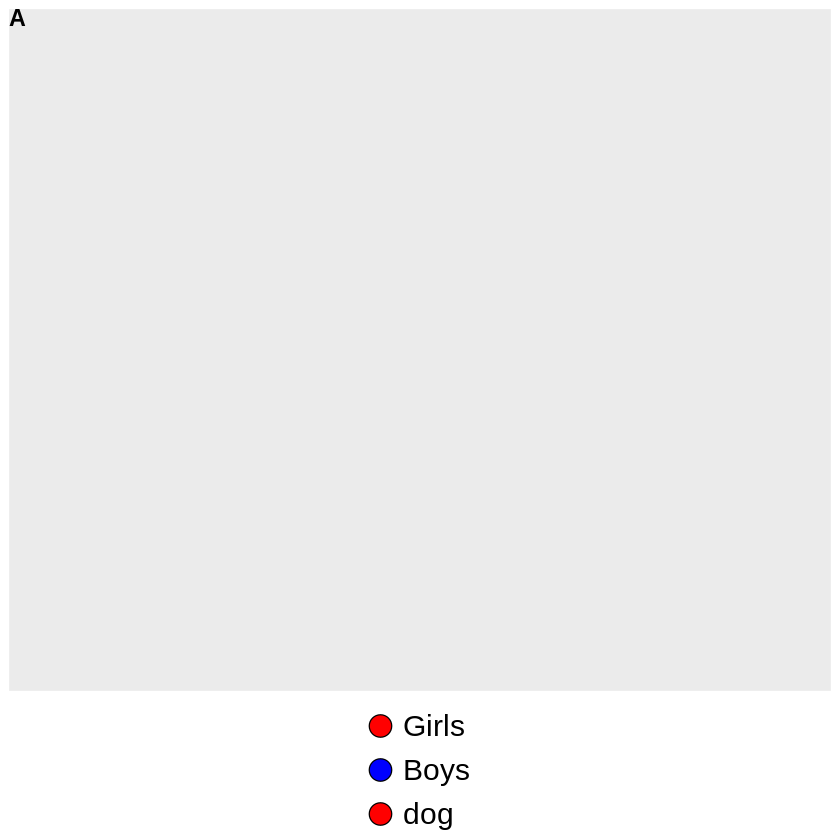

In [12]:
plot_grid(p, legd, nrow = 2, rel_heights = c(1,0.2))

In [7]:
get_ideogram_labels = function(rtedf, elementlist, namedmarkerlist, namedcolorlist) {
    tempdf = rtedf[,c(1,3,4,5)]
    colnames(tempdf) = c("Type", "Chr", "Start", "End")
    tempdf = tempdf %>% filter(Type %in% elementlist)
    tempdf = tempdf %>% mutate(Shape = namedmarkerlist[Type]) %>% mutate(color = namedcolorlist[Type])
    df = tempdf[,c("Type", "Shape", "Chr", "Start", "End", "color")]
    return(df)
}

In [100]:
karyotype = read.csv("/users/mkelsey/data/ref/genomes/hs1/karyotype.csv")

In [111]:
write.table(karyotype, "/users/mkelsey/data/ref/genomes/hs1/karyotype.tsv",row.names = TRUE, sep = '\t')

In [116]:
gene_density <- GFFex(input = "/users/mkelsey/data/ref/genomes/hs1/annotations/hs1.110.20220412.ncbiRefSeqUCSCstyle.gtf", karyotype = "/users/mkelsey/data/ref/genomes/hs1/karyotype.tsv", feature = "exon", window = 1000000)


In [124]:
rtes = read.delim("/users/mkelsey/data/marco/results/agg/repeatanalysis/allactiveDETEs.tsv", sep = '\t', header = FALSE)
rownames(rtes) = 1:nrow(rtes)

In [143]:
labels = get_ideogram_labels(rtes, c("L1HS"), c("L1HS" = "circle"), c("L1HS"= "6a3d9a"))

In [144]:
ideogram(karyotype = karyotype, overlaid = gene_density, label = labels, label_type = "marker")

In [145]:
convertSVG("chromosome.svg", device = "png")

In [50]:

library("readr")
library("stringr")
library("dplyr")
library("ggplot2")
library("tibble")
library("RColorBrewer")
library("magrittr")
library("cowplot")
library("eulerr")
library("ggVennDiagram")
library("Gviz")
library("GenomicRanges")
library("rtracklayer")
library("trackViewer")
library("org.Hs.eg.db")
# order matters for the colors!

######## MAIN FUNCTIONS
#### PLOTTING
plotRTE <- function(rte, df, lims = c(-1, 11), title = "", colors = c("red", "blue", "grey"), alpha = 1, number_to_sample = NULL) {
    matches <- grep(rte, results$Geneid)
    dat <- results[matches, ]
    if (is.null(number_to_sample)) {
        rteplot <- dat %>% ggplot() +
            geom_point(aes(x = .data[[xval]], y = .data[[yval]], color = Significance)) +
            geom_abline(intercept = 0) +
            coord_fixed() +
            xlim(lims) +
            ylim(lims) +
            scale_color_manual(values = colors) +
            theme_cowplot() +
            ggtitle(title) +
            panel_border(color = "black", linetype = 1, remove = FALSE) +
            theme(axis.line = element_blank()) +
            labs(x = paste(quanttype, "counts", levelslegendmap[contrast_base_level], sep = " "), y = paste(quanttype, "counts", levelslegendmap[contrast_level_2], sep = " "))
        return(rteplot)
    } else {
        number_to_sample <- min(length(rownames(dat)), number_to_sample)
        datasampled <- dat[sample(rownames(dat), number_to_sample, replace = FALSE), ]
        rteplot <- datasampled %>% ggplot() +
            geom_point(aes(x = .data[[xval]], y = .data[[yval]], color = Significance)) +
            geom_abline(intercept = 0) +
            coord_fixed() +
            xlim(lims) +
            ylim(lims) +
            scale_color_manual(values = colors) +
            theme_cowplot() +
            ggtitle(title) +
            panel_border(color = "black", linetype = 1, remove = FALSE) +
            theme(axis.line = element_blank()) +
            labs(x = paste(quanttype, "counts", levelslegendmap[contrast_base_level], sep = " "), y = paste(quanttype, "counts", levelslegendmap[contrast_level_2], sep = " "))
        return(rteplot)
    }
}

plotAggRTE <- function(df, coltogroupby = "ActiveTE", valuescol = "log2FoldChange") {
    agg <- df %>%
        filter(.data[[coltogroupby]] != "Other") %>%
        ggplot(aes(x = .data[[coltogroupby]], y = .data[[valuescol]])) +
        geom_violin(draw_quantiles = c(0.5)) +
        stat_summary(fun = "mean", geom = "point", color = "black") +
        geom_hline(aes(yintercept = 0), color = "red") +
        ggtitle("RTEs") +
        coord_fixed() +
        ylim(c(-11, 11)) +
        theme_cowplot() +
        panel_border(color = "black", linetype = 1, remove = FALSE) +
        theme(axis.line = element_blank()) +
        theme(aspect.ratio = 1)
    return(agg)
}

makeLegendGrob <- function(labels, fill = c("blue", "red"), cex = 1) {
    return(legendGrob(labels,
        pch = 21,
        gp = gpar(
            col = "black",
            fill = fill,
            cex = cex
        )
    ))
}

euPlot <- function(fit, contrasts, fill = factor(c("blue", "red"), ordered = TRUE), alpha = 0.5,legendcex = 1, legend = TRUE, labels = FALSE, main = "") {
    if (legend == TRUE) {
        legd <- makeLegendGrob(contrasts, fill, legendcex)
        p <- plot(
            fit,
            main = main,
            fills = list(fill = fill, alpha=alpha) ,
            legend = FALSE,
            quantities = list(col = "black"),
            labels = labels
        )
        row <- plot_grid(p)
        plot <- plot_grid(row, legd, nrow = 2, rel_heights = c(1, 0.25))
    } else {
        plot(
            fit,
            main = main,
            fills = list(fill = fill, alpha=alpha) ,
            legend = FALSE,
            quantities = list(col = "black"),
            labels = labels
        )
    }
}

In [51]:
l = list(A = c("dog", "cat"), B = c("dog", "zebra", "wolf"))
contrasts = c("cat", "dog")
sig = "**"
rte = "L1"
direction = "UP"
fill = c("blue", "red")

In [52]:
fit <- euler(l, shape = "ellipse")


In [61]:
p <- euPlot(fit, gsub("condition_", "", contrasts), fill = fill, alpha = 0.75, main = paste(rte, direction, sep = " "), legendcex = 1)


In [62]:
my_comma <- function(num) {format(round(as.numeric(num), 1), nsmall=0, big.mark=",")}


In [63]:
num = 1000000
pl <- ggdraw(p) +
    annotate("text", label = sig, x = Inf, y = Inf, vjust = 1, hjust = 1, size = 20) +
    annotate("text", label = paste0("\nU: ", my_comma(num)), x = Inf, y = Inf, vjust = 1, hjust = 1, size = 7)


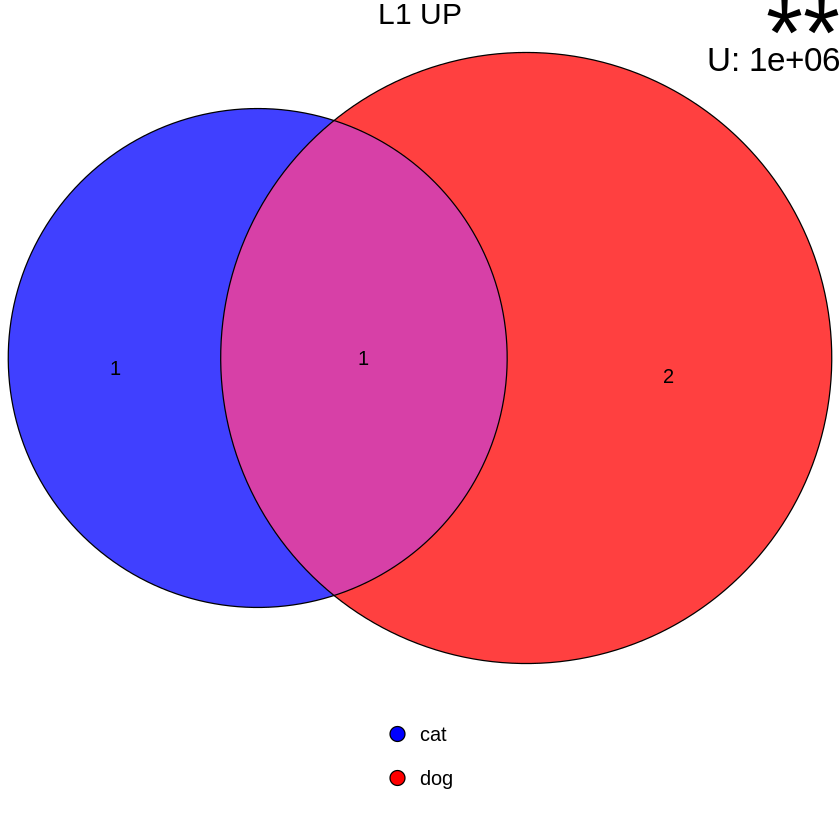

In [64]:
pl